# Import

In [1]:
!pip install nltk
!pip install PyThaiNLP
!pip install --upgrade gensim
!pip install k-means-constrained

In [2]:
#k_means_constrained
from k_means_constrained import KMeansConstrained

import os
# from os import path
import sys
sys.path.insert(0, '/Users/pzzlng1/swordcloud/swordcloud')

import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
#create wc
import gensim

#for edit class wc code
import nltk

have to delete '.' after 'from':


> *from .query_integral_image import query_integral_image as old_query_integral_image*

> *from .tokenization import unigrams_and_bigrams, process_tokens*


in wordcloud.py before running (or it would be error)



In [100]:
import wordcloud as wc
from wordcloud import WordCloud

import tokenization as tk
import processing as pc

In [101]:
#embedding
from gensim.models import word2vec, KeyedVectors

In [102]:
#process file
import json

# Creating T-SNE wordcloud for Thai language

In [65]:
df = pd.read_csv("w_review_data.csv",names=["text"])

In [66]:
df.head()

text
0  ร้านอาหารใหญ่มากกกกกกก \nเลี้ยวเข้ามาเจอห้องน้...
1  อาหารที่นี่เป็นอาหารจีนแคะที่หากินยากในบ้านเรา...
2  ปอเปี๊ยะสด ทุกวันนี้รู้สึกว่าหากินยาก (ร้านที่...
3  รัานคัพเค้กในเมืองไทยมีไม่มาก หลายๆคนอาจจะสงสั...
4  อร่อย!!! เดินผ่านDigital gatewayทุกวัน ไม่ยักร...

In [67]:
txt = list(df['text'][0:4000])

In [68]:
len(txt)

4000

In [103]:
wn_rawwc = WordCloud(background_color='white',
                     width=3360,
                     height=1890,
                     colormap='tab10',
                     color_func=lambda *args, **kwargs: "black",
                     prefer_horizontal=1.0)

In [70]:
wn_rawwc.generate(txt, lang='TH')

/Users/pzzlng1/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/Users/pzzlng1/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/Users/pzzlng1/swordcloud/swordcloud/query_integral_image.py:56: RuntimeWarning: overflow encountered in uint_scalars
  area -= integral_image[new_center_x + size_x, new_center_y] + integral_image[new_center_x, new_center_y + size_y]


(-0.5, 3359.5, 1889.5, -0.5)

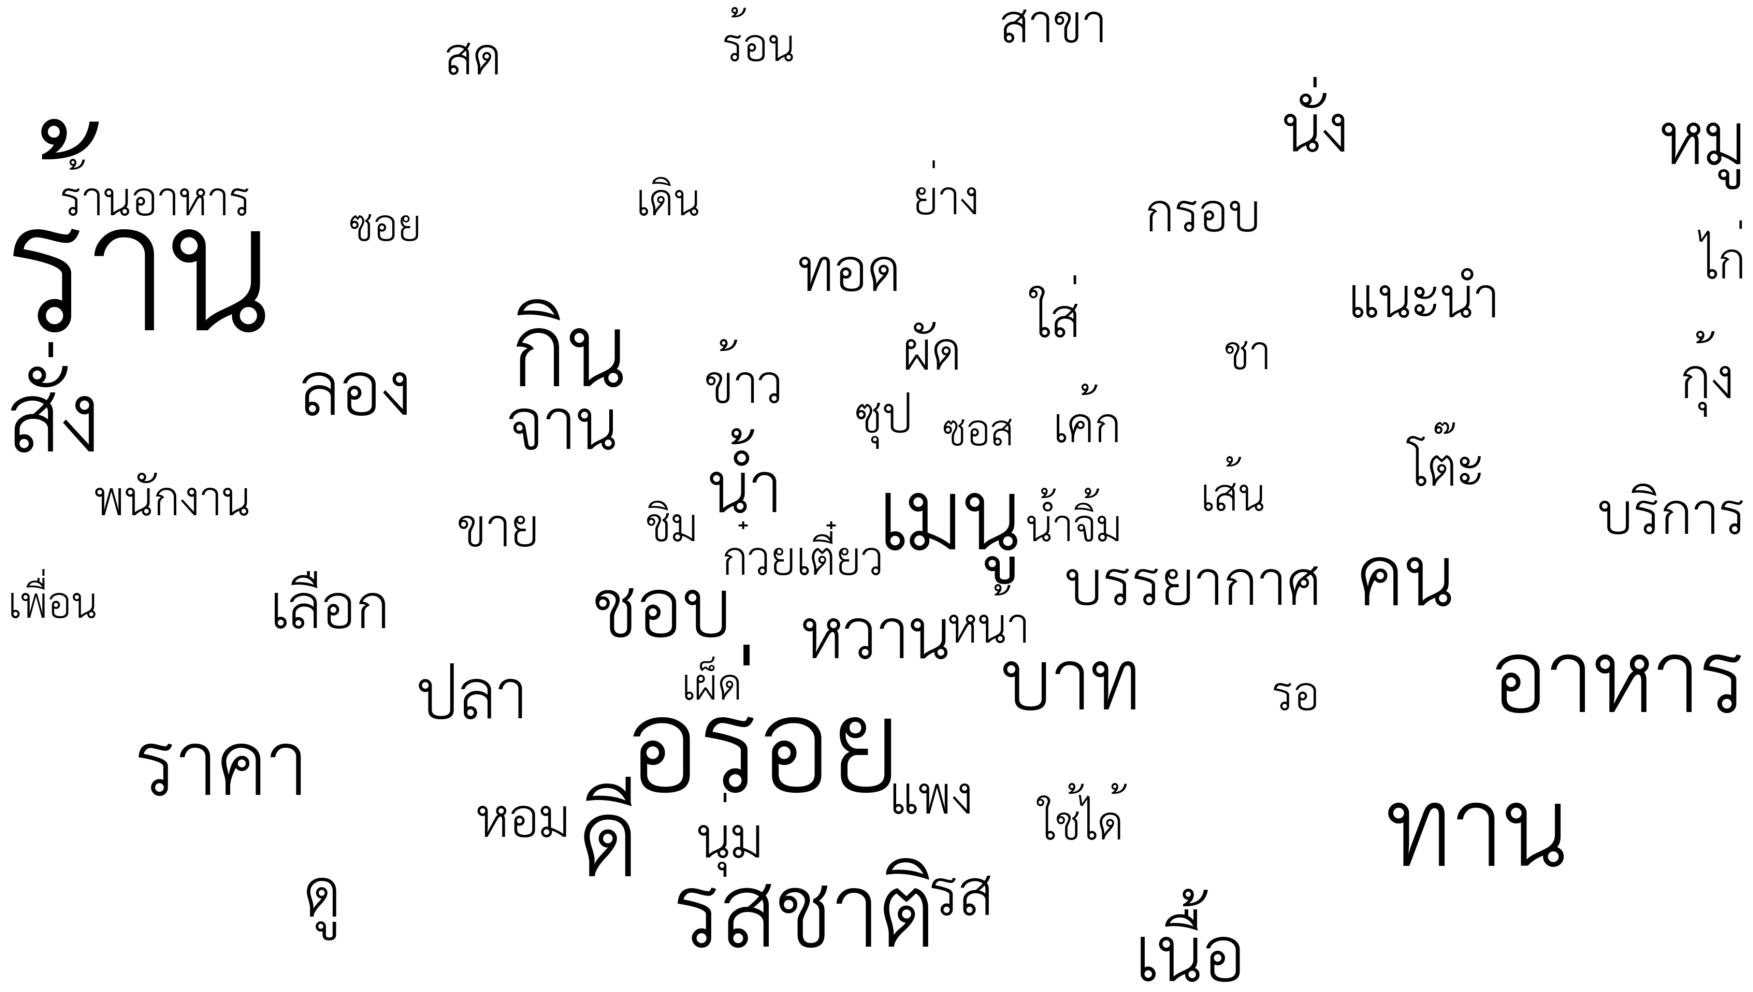

In [71]:
plt.figure(figsize=(32,18))
plt.imshow(wn_rawwc,interpolation="bilinear")
plt.axis('off')

#Create Wordcloud 
both TH & ENG are the same except wn_focused_w_count_len <br>
in EN corpus it might be xx_focused_w_count_len = wn_focused_w_count_eq = {k:v/len(k) for k in wn_tsne_d.keys()} <br>
Thai data from Wongnai


### preprocessing data

required files:

*   wn_tsne_d.json




In [104]:
wn_focused_w_count = wn_rawwc.process_text(text=txt)
wn_focused_w_count

{'ร้าน': 13524,
 'อร่อย': 6310,
 'ทาน': 4435,
 'ดี': 4193,
 'รสชาติ': 3800,
 'กิน': 3680,
 'อาหาร': 3639,
 'เมนู': 3527,
 'สั่ง': 3375,
 'ราคา': 2859,
 'คน': 2545,
 'บาท': 2531,
 'ชอบ': 2360,
 'เนื้อ': 2120,
 'ลอง': 1962,
 'หมู': 1876,
 'จาน': 1768,
 'น้ำ': 1744,
 'หวาน': 1731,
 'ปลา': 1680,
 'ดู': 1633,
 'นั่ง': 1548,
 'รส': 1474,
 'บรรยากาศ': 1398,
 'เลือก': 1355,
 'ทอด': 1289,
 'บริการ': 1205,
 'นุ่ม': 1167,
 'กุ้ง': 1142,
 'แนะนำ': 1125,
 'ใส่': 1056,
 'หอม': 1053,
 'สาขา': 1021,
 'ขาย': 1017,
 'โต๊ะ': 1017,
 'ผัด': 1013,
 'ข้าว': 1001,
 'กรอบ': 998,
 'แพง': 986,
 'สด': 928,
 'ไก่': 917,
 'ซุป': 879,
 'เค้ก': 841,
 'หน้า': 839,
 'พนักงาน': 812,
 'ย่าง': 787,
 'ร้านอาหาร': 780,
 'ใช้ได้': 778,
 'ก๋วยเตี๋ยว': 777,
 'รอ': 770,
 'ชิม': 765,
 'ชา': 762,
 'เส้น': 719,
 'ร้อน': 710,
 'น้ำจิ้ม': 703,
 'ซอย': 691,
 'เดิน': 690,
 'ซอส': 662,
 'เผ็ด': 661,
 'เพื่อน': 654}

In [105]:
wn_emb = pc.embed_w2v(wn_focused_w_count)
wn_emb

[('ร้าน',
  array([-2.37803e-01, -2.82060e-02,  1.19615e-01, -4.29470e-02,
         -1.15431e-01, -2.36688e-01, -2.09612e-01,  6.81796e-01,
          3.88740e-02,  5.12190e-02,  2.28358e-01,  2.73710e-02,
          8.50310e-02,  1.11073e-01, -6.65210e-02, -1.37321e-01,
          2.50164e-01, -2.73555e-01, -3.77217e-01, -5.43233e-01,
          1.23810e-02,  1.00195e-01,  1.16477e-01,  1.16269e-01,
         -2.65275e-01,  1.80259e-01,  3.31555e-01, -3.11156e-01,
         -9.69620e-02, -5.78770e-01, -5.11760e-02, -2.28220e-02,
         -1.96060e-01, -3.25587e-01, -4.42520e-02,  9.42630e-02,
         -6.45460e-02,  1.91620e-02,  2.18320e-02, -4.62026e-01,
         -9.76190e-02, -1.72190e-02,  1.61628e-01,  2.80334e-01,
         -5.54850e-02, -5.10690e-02,  1.67495e-01, -2.85197e-01,
          7.11580e-02,  1.35626e-01, -1.76027e-01,  2.45770e-02,
         -3.10000e-04, -6.84680e-02,  5.84221e-01,  1.74115e-01,
         -8.82670e-02, -7.86350e-02,  4.91417e-01,  1.99718e-01,
          1.314

In [107]:
# wn_focused_w_count_len = {}

# up_n_down = set()
# up_n_down.update({"\u0e31","\u0e3a","\u0e34","\u0e35","\u0e36","\u0e37","\u0e38","\u0e39"})
# up_n_down.update({"\u0e47","\u0e48","\u0e49","\u0e4a","\u0e4b","\u0e47c","\u0e4d","\u0e4e","\u0e4f",'์'})

# not_up_n_down = set()
# check_istruly_updown = set()

# for k,v in wn_focused_w_count.items():
#   for char in k:
#     count = len(k)
#     if char not in up_n_down:
#       not_up_n_down.add(char)
#     else:
#       check_istruly_updown.add(char)
#       count -= 1
#   wn_focused_w_count_len[k] = v/count

In [106]:
wn_focused_w_count_eq = {k:1 for k in wn_focused_w_count.keys()}
wn_focused_w_count_eq

{'ร้าน': 1,
 'อร่อย': 1,
 'ทาน': 1,
 'ดี': 1,
 'รสชาติ': 1,
 'กิน': 1,
 'อาหาร': 1,
 'เมนู': 1,
 'สั่ง': 1,
 'ราคา': 1,
 'คน': 1,
 'บาท': 1,
 'ชอบ': 1,
 'เนื้อ': 1,
 'ลอง': 1,
 'หมู': 1,
 'จาน': 1,
 'น้ำ': 1,
 'หวาน': 1,
 'ปลา': 1,
 'ดู': 1,
 'นั่ง': 1,
 'รส': 1,
 'บรรยากาศ': 1,
 'เลือก': 1,
 'ทอด': 1,
 'บริการ': 1,
 'นุ่ม': 1,
 'กุ้ง': 1,
 'แนะนำ': 1,
 'ใส่': 1,
 'หอม': 1,
 'สาขา': 1,
 'ขาย': 1,
 'โต๊ะ': 1,
 'ผัด': 1,
 'ข้าว': 1,
 'กรอบ': 1,
 'แพง': 1,
 'สด': 1,
 'ไก่': 1,
 'ซุป': 1,
 'เค้ก': 1,
 'หน้า': 1,
 'พนักงาน': 1,
 'ย่าง': 1,
 'ร้านอาหาร': 1,
 'ใช้ได้': 1,
 'ก๋วยเตี๋ยว': 1,
 'รอ': 1,
 'ชิม': 1,
 'ชา': 1,
 'เส้น': 1,
 'ร้อน': 1,
 'น้ำจิ้ม': 1,
 'ซอย': 1,
 'เดิน': 1,
 'ซอส': 1,
 'เผ็ด': 1,
 'เพื่อน': 1}

### Generate from frequencies

/Users/pzzlng1/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/Users/pzzlng1/swordcloud/swordcloud/query_integral_image.py:56: RuntimeWarning: overflow encountered in uint_scalars
  area -= integral_image[new_center_x + size_x, new_center_y] + integral_image[new_center_x, new_center_y + size_y]


(-0.5, 3359.5, 1889.5, -0.5)

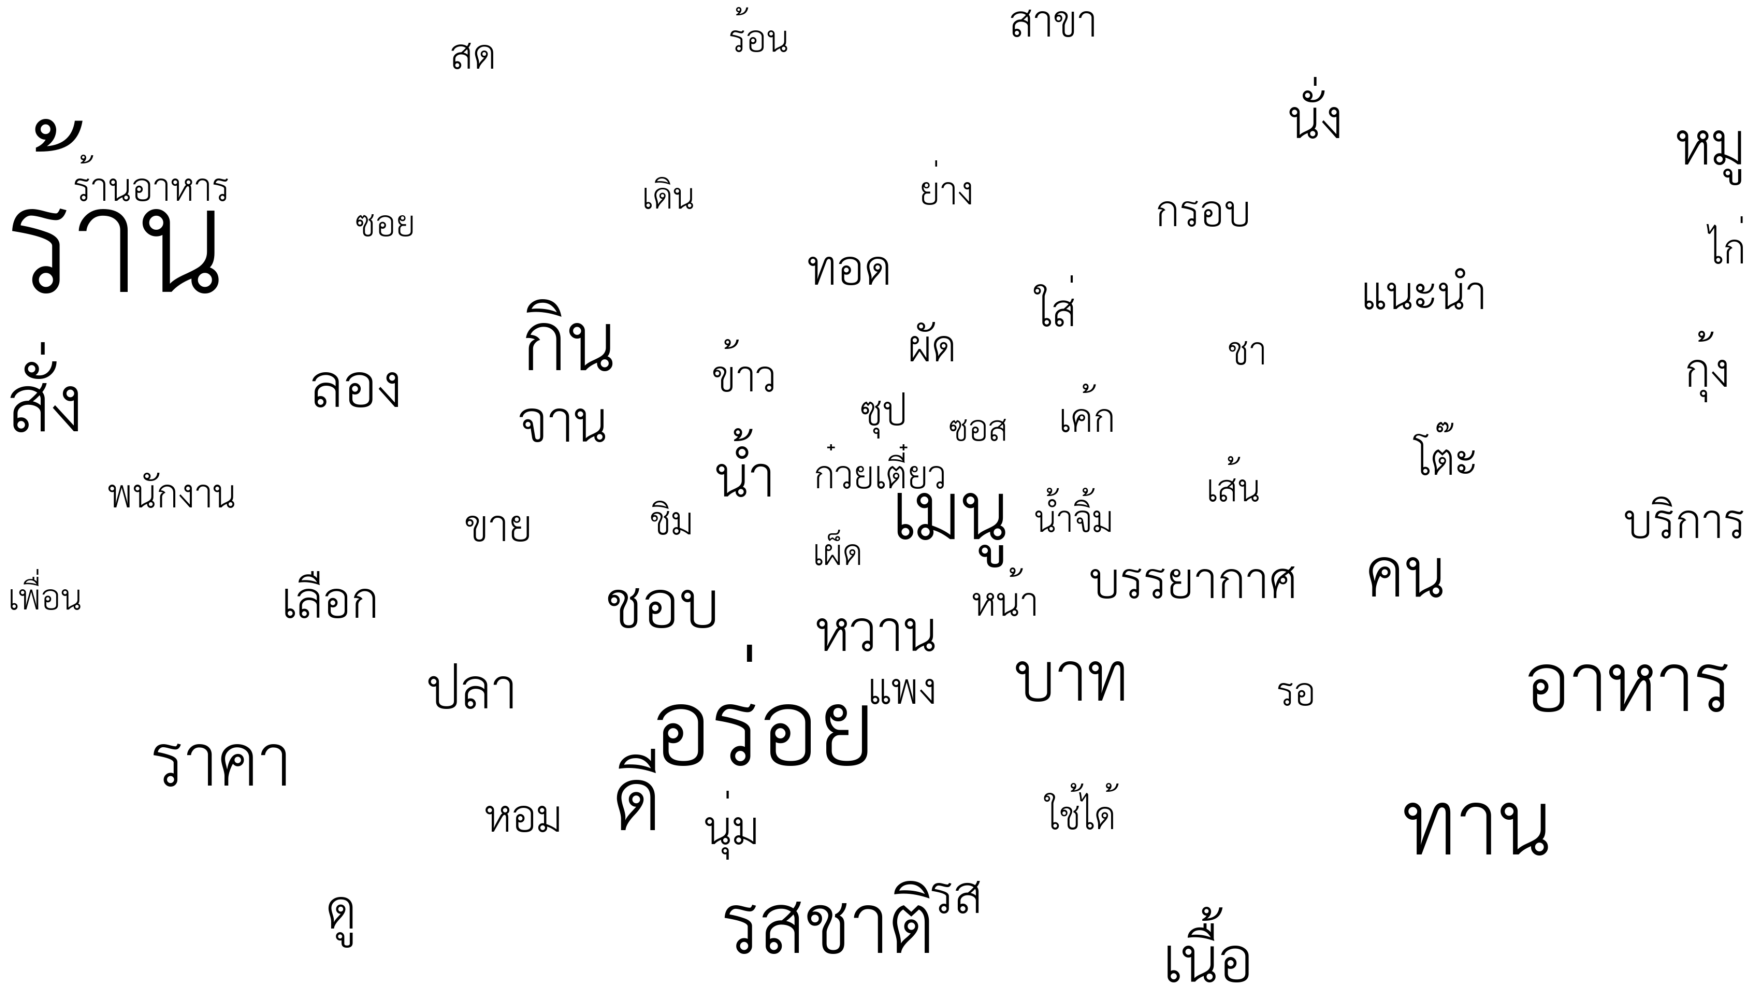

In [108]:
# wn_rawwc.generate_from_frequencies(wn_focused_w_count,max_font_size=400,tsne_plot=wn_tsne_d,lang='TH')
wn_rawwc.generate_from_frequencies(wn_focused_w_count,max_font_size=400,lang='TH')
plt.figure(figsize=(32,18))
plt.imshow(wn_rawwc,interpolation="bilinear")
plt.axis('off')

# Kmeans & LDA

### pre data for combined with kmeans

In [77]:
wn_focused_w_list = list(wn_focused_w_count.keys())

In [109]:
wn_k_means_freq = wc.generate_kmeans_frequencies(wn_focused_w_list,wn_focused_w_count,wn_emb,NUM_CLUSTERS = 6,size_min=10,size_max=12)

/Users/pzzlng1/swordcloud/swordcloud/wordcloud.py:1126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clus_i['total'] = clus_i['word_count'].sum()


In [79]:
wn_k_means_freq

[(0,
  [('ทาน', 0.2667829643888354),
   ('สั่ง', 0.20301973051010588),
   ('จาน', 0.10635226179018287),
   ('นั่ง', 0.09311838306063523),
   ('บรรยากาศ', 0.08409528392685274),
   ('หอม', 0.06334215591915303),
   ('สด', 0.05582290664100096),
   ('เส้น', 0.043250721847930704),
   ('ร้อน', 0.04270933589990376),
   ('เดิน', 0.04150625601539942)]),
 (1,
  [('อาหาร', 0.2322864802757564),
   ('เนื้อ', 0.1353249074428699),
   ('หมู', 0.11974977658623771),
   ('หวาน', 0.11049406357717349),
   ('ทอด', 0.08228009702540534),
   ('นุ่ม', 0.07449253159708924),
   ('กุ้ง', 0.07289671900931954),
   ('กรอบ', 0.06370483850376611),
   ('ไก่', 0.058534405719392314),
   ('ย่าง', 0.05023618026298991)]),
 (2,
  [('ร้าน', 0.5060240963855421),
   ('รสชาติ', 0.1421836413978897),
   ('ราคา', 0.10697448177804385),
   ('บริการ', 0.045087181022225545),
   ('สาขา', 0.03820249943874878),
   ('ขาย', 0.038052832447803636),
   ('โต๊ะ', 0.038052832447803636),
   ('พนักงาน', 0.030382399161864852),
   ('ร้านอาหาร', 0.02918

In [80]:
list(map(lambda n: 1/(2**n), [0,1,2,3])) + [0.1]

[1.0, 0.5, 0.25, 0.125, 0.1]

In [81]:
def rank_kmeans(kmeans_freq, rank_type='big'):
    if rank_type=='near':
        val = [1.0, 0.8, 0.6, 0.5, 0.4]
#     elif rank_type== 'big':
#         val = [1.0, 0.5, 0.25, 0.125, 0.1]
    else:
        val = [1.0, 0.5, 0.25, 0.125, 0.1]
    
    rank = {}
    for _,lst in kmeans_freq:
        rank.update(dict((tup[0], val[j]) if j < 4 else (tup[0], val[4]) for j,tup in enumerate(lst)))
        
    return rank

In [82]:
wn_kmeans_nearrank = rank_kmeans(wn_k_means_freq, rank_type='near')
wn_kmeans_nearrank

{'ทาน': 1.0,
 'สั่ง': 0.8,
 'จาน': 0.6,
 'นั่ง': 0.5,
 'บรรยากาศ': 0.4,
 'หอม': 0.4,
 'สด': 0.4,
 'เส้น': 0.4,
 'ร้อน': 0.4,
 'เดิน': 0.4,
 'อาหาร': 1.0,
 'เนื้อ': 0.8,
 'หมู': 0.6,
 'หวาน': 0.5,
 'ทอด': 0.4,
 'นุ่ม': 0.4,
 'กุ้ง': 0.4,
 'กรอบ': 0.4,
 'ไก่': 0.4,
 'ย่าง': 0.4,
 'ร้าน': 1.0,
 'รสชาติ': 0.8,
 'ราคา': 0.6,
 'บริการ': 0.5,
 'สาขา': 0.4,
 'ขาย': 0.4,
 'โต๊ะ': 0.4,
 'พนักงาน': 0.4,
 'ร้านอาหาร': 0.4,
 'ซอย': 0.4,
 'อร่อย': 1.0,
 'เมนู': 0.8,
 'ผัด': 0.6,
 'ซุป': 0.5,
 'เค้ก': 0.4,
 'ก๋วยเตี๋ยว': 0.4,
 'ชิม': 0.4,
 'น้ำจิ้ม': 0.4,
 'ซอส': 0.4,
 'เผ็ด': 0.4,
 'ดี': 1.0,
 'คน': 0.8,
 'บาท': 0.6,
 'ปลา': 0.5,
 'ดู': 0.4,
 'ข้าว': 0.4,
 'แพง': 0.4,
 'หน้า': 0.4,
 'รอ': 0.4,
 'ชา': 0.4,
 'กิน': 1.0,
 'ชอบ': 0.8,
 'ลอง': 0.6,
 'น้ำ': 0.5,
 'รส': 0.4,
 'เลือก': 0.4,
 'แนะนำ': 0.4,
 'ใส่': 0.4,
 'ใช้ได้': 0.4,
 'เพื่อน': 0.4}

In [83]:
wn_kmeans_bigrank = rank_kmeans(wn_k_means_freq, rank_type='big')
wn_kmeans_bigrank

{'ทาน': 1.0,
 'สั่ง': 0.5,
 'จาน': 0.25,
 'นั่ง': 0.125,
 'บรรยากาศ': 0.1,
 'หอม': 0.1,
 'สด': 0.1,
 'เส้น': 0.1,
 'ร้อน': 0.1,
 'เดิน': 0.1,
 'อาหาร': 1.0,
 'เนื้อ': 0.5,
 'หมู': 0.25,
 'หวาน': 0.125,
 'ทอด': 0.1,
 'นุ่ม': 0.1,
 'กุ้ง': 0.1,
 'กรอบ': 0.1,
 'ไก่': 0.1,
 'ย่าง': 0.1,
 'ร้าน': 1.0,
 'รสชาติ': 0.5,
 'ราคา': 0.25,
 'บริการ': 0.125,
 'สาขา': 0.1,
 'ขาย': 0.1,
 'โต๊ะ': 0.1,
 'พนักงาน': 0.1,
 'ร้านอาหาร': 0.1,
 'ซอย': 0.1,
 'อร่อย': 1.0,
 'เมนู': 0.5,
 'ผัด': 0.25,
 'ซุป': 0.125,
 'เค้ก': 0.1,
 'ก๋วยเตี๋ยว': 0.1,
 'ชิม': 0.1,
 'น้ำจิ้ม': 0.1,
 'ซอส': 0.1,
 'เผ็ด': 0.1,
 'ดี': 1.0,
 'คน': 0.5,
 'บาท': 0.25,
 'ปลา': 0.125,
 'ดู': 0.1,
 'ข้าว': 0.1,
 'แพง': 0.1,
 'หน้า': 0.1,
 'รอ': 0.1,
 'ชา': 0.1,
 'กิน': 1.0,
 'ชอบ': 0.5,
 'ลอง': 0.25,
 'น้ำ': 0.125,
 'รส': 0.1,
 'เลือก': 0.1,
 'แนะนำ': 0.1,
 'ใส่': 0.1,
 'ใช้ได้': 0.1,
 'เพื่อน': 0.1}

### tsne recolour

In [84]:
cols = ["#BF0F61","#4696A2","#D95043","#55A45B","#695752","#834fab"]

In [85]:
color_to_words = {cols[col]: [wn_k_means_freq[col][1][i][0] for i in range(10)] for col in range(len(wn_k_means_freq))}
color_to_words

{'#BF0F61': ['ทาน',
  'สั่ง',
  'จาน',
  'นั่ง',
  'บรรยากาศ',
  'หอม',
  'สด',
  'เส้น',
  'ร้อน',
  'เดิน'],
 '#4696A2': ['อาหาร',
  'เนื้อ',
  'หมู',
  'หวาน',
  'ทอด',
  'นุ่ม',
  'กุ้ง',
  'กรอบ',
  'ไก่',
  'ย่าง'],
 '#D95043': ['ร้าน',
  'รสชาติ',
  'ราคา',
  'บริการ',
  'สาขา',
  'ขาย',
  'โต๊ะ',
  'พนักงาน',
  'ร้านอาหาร',
  'ซอย'],
 '#55A45B': ['อร่อย',
  'เมนู',
  'ผัด',
  'ซุป',
  'เค้ก',
  'ก๋วยเตี๋ยว',
  'ชิม',
  'น้ำจิ้ม',
  'ซอส',
  'เผ็ด'],
 '#695752': ['ดี',
  'คน',
  'บาท',
  'ปลา',
  'ดู',
  'ข้าว',
  'แพง',
  'หน้า',
  'รอ',
  'ชา'],
 '#834fab': ['กิน',
  'ชอบ',
  'ลอง',
  'น้ำ',
  'รส',
  'เลือก',
  'แนะนำ',
  'ใส่',
  'ใช้ได้',
  'เพื่อน']}

In [86]:
default_color = "#2D2926"

# Create a color function with multiple tones
gcfunc = wc.grouped_color_func(color_to_words, default_color)
gcfunc.color_func_to_words

[(<function wordcloud.get_single_color_func.<locals>.single_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None)>,
  {'จาน',
   'ทาน',
   'นั่ง',
   'บรรยากาศ',
   'ร้อน',
   'สด',
   'สั่ง',
   'หอม',
   'เดิน',
   'เส้น'}),
 (<function wordcloud.get_single_color_func.<locals>.single_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None)>,
  {'กรอบ',
   'กุ้ง',
   'ทอด',
   'นุ่ม',
   'ย่าง',
   'หมู',
   'หวาน',
   'อาหาร',
   'เนื้อ',
   'ไก่'}),
 (<function wordcloud.get_single_color_func.<locals>.single_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None)>,
  {'ขาย',
   'ซอย',
   'บริการ',
   'พนักงาน',
   'รสชาติ',
   'ราคา',
   'ร้าน',
   'ร้านอาหาร',
   'สาขา',
   'โต๊ะ'}),
 (<function wordcloud.get_single_color_func.<locals>.single_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, rando

(-0.5, 3359.5, 1889.5, -0.5)

<Figure size 432x288 with 0 Axes>

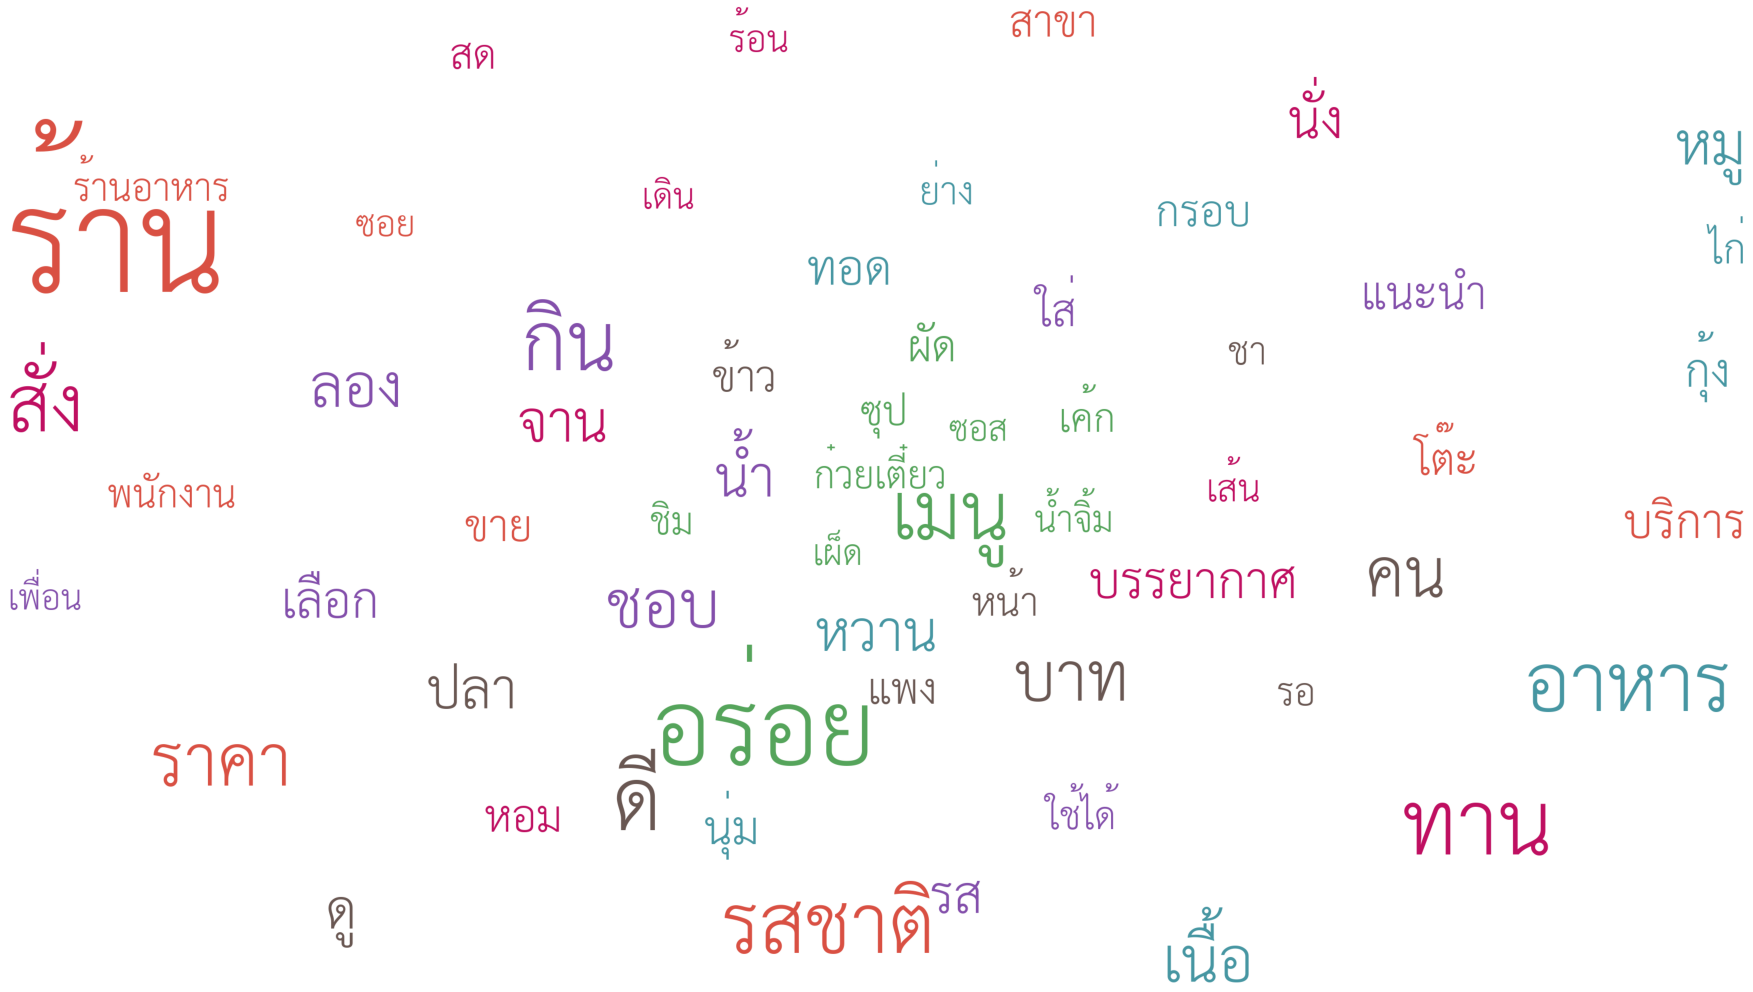

In [87]:
# Apply our color function
wn_rawwc.recolor(color_func=gcfunc) #you may try wn_eqwc

# Plot
plt.figure()
plt.figure(figsize=(32,18))
plt.imshow(wn_rawwc)
plt.axis('off')

(-0.5, 3359.5, 1889.5, -0.5)

<Figure size 432x288 with 0 Axes>

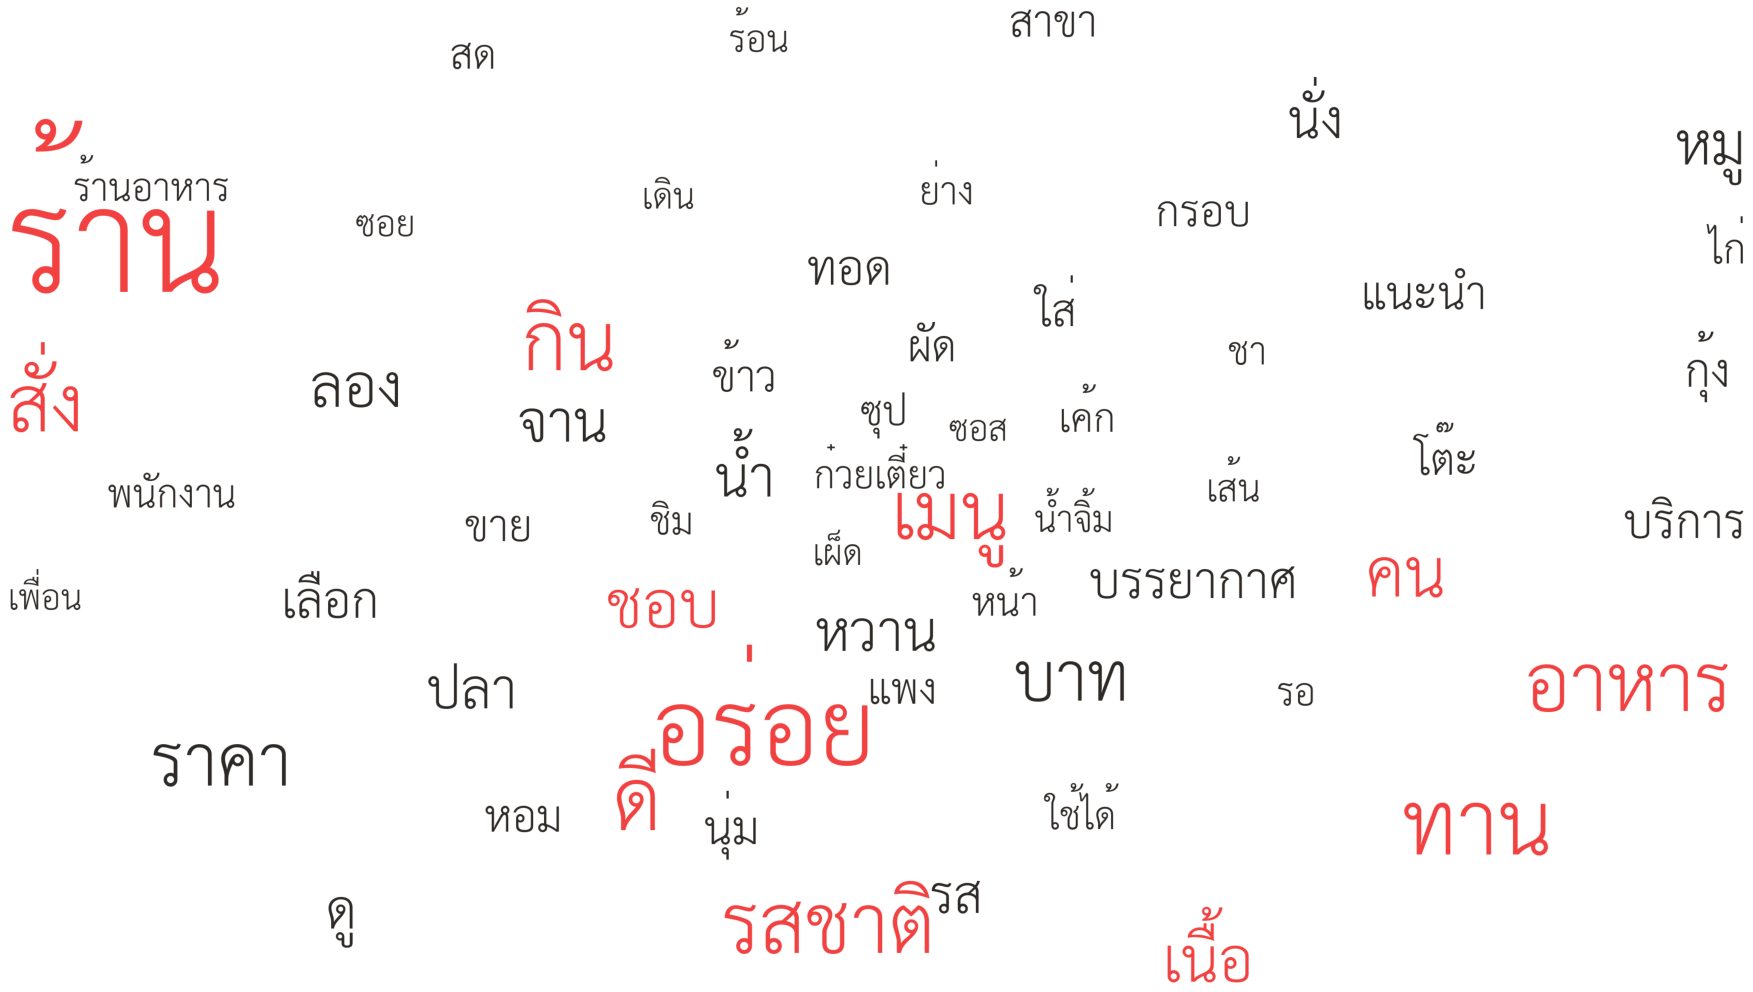

In [88]:
cherry = "#F24141"
color_to_words = {cherry: [wn_k_means_freq[col][1][i][0] for i in range(10) if i < 2 for col in range(len(wn_k_means_freq)) ]}
default_color = "#2D2926"

# Create a color function with multiple tones
gcfunc = wc.grouped_color_func(color_to_words,default_color)

# Apply our color function
wn_rawwc.recolor(color_func=gcfunc) #you may try wn_eqwc

# Plot
plt.figure()
plt.figure(figsize=(32,18))
plt.imshow(wn_rawwc)
plt.axis('off')

### kmean wc

/Users/pzzlng1/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/Users/pzzlng1/swordcloud/swordcloud/query_integral_image.py:56: RuntimeWarning: overflow encountered in uint_scalars
  area -= integral_image[new_center_x + size_x, new_center_y] + integral_image[new_center_x, new_center_y + size_y]


(-0.5, 3359.5, 1889.5, -0.5)

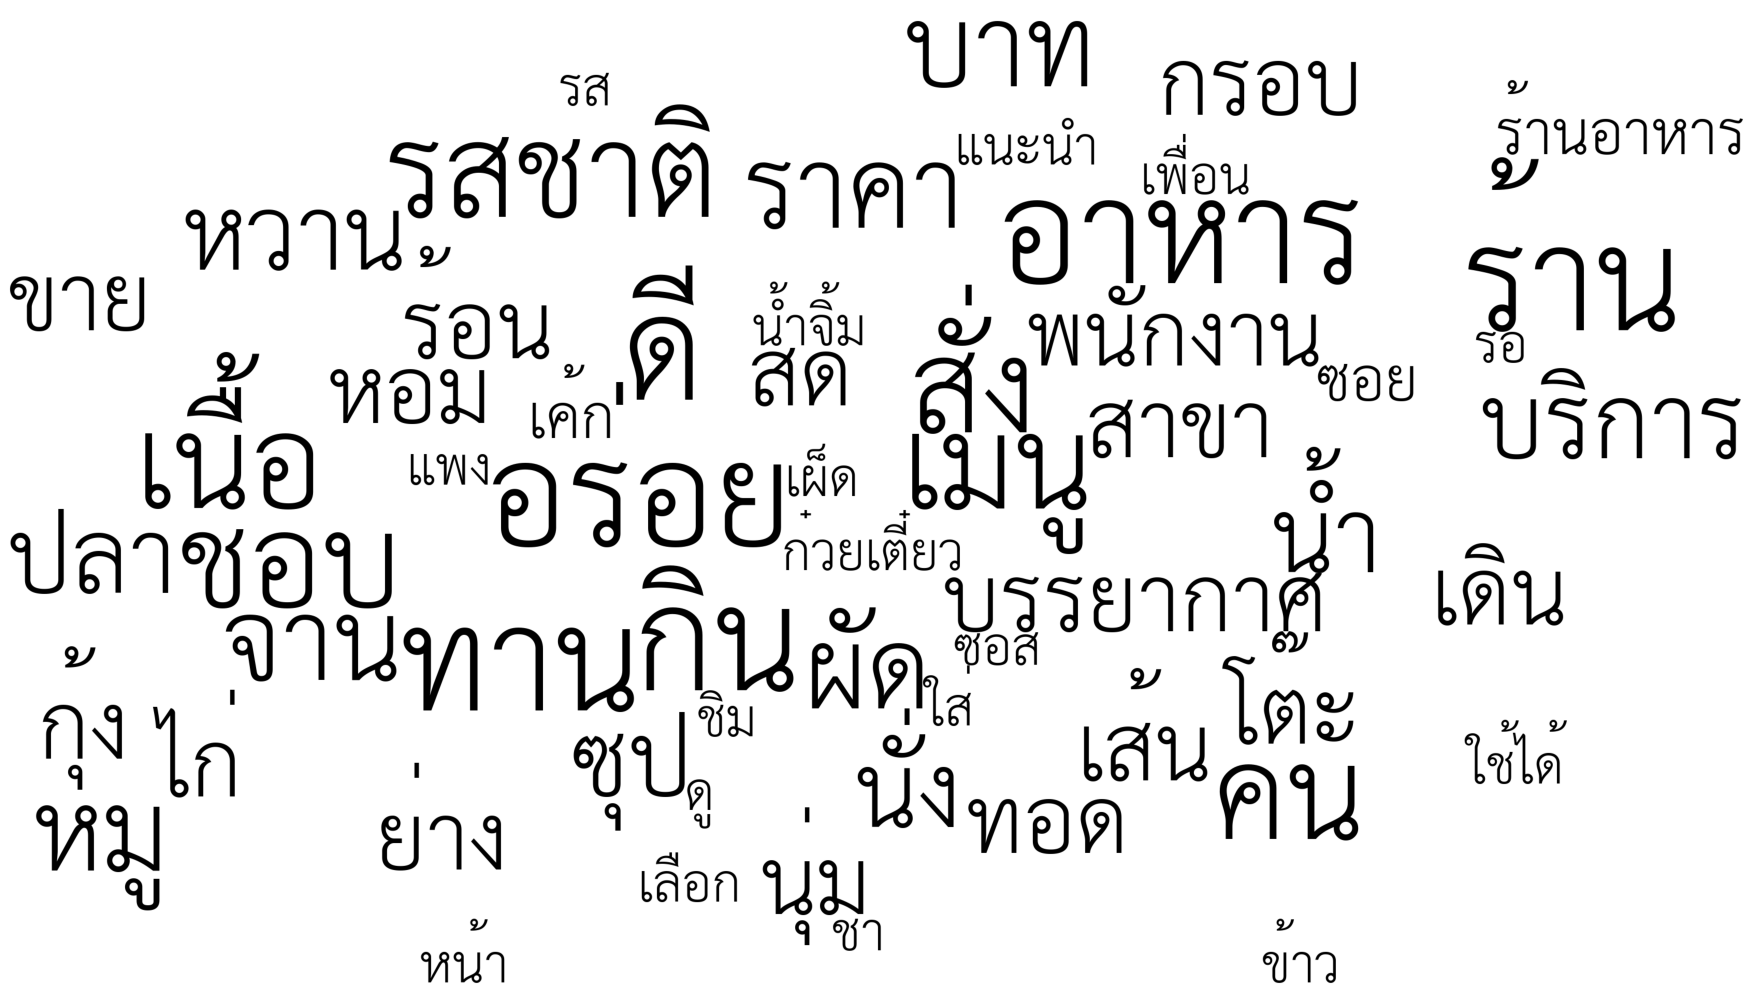

In [89]:
wn_nearrankwc = WordCloud(background_color='white',
                          width=3360,
                          height=1890,
                          colormap='tab10',
                          color_func=lambda *args, **kwargs: "black",
                          prefer_horizontal=1.0)

wn_nearrankwc.generate_from_frequencies(frequencies=wn_kmeans_nearrank  ,max_font_size=400)
plt.figure(figsize=(32,18))
plt.imshow(wn_nearrankwc)
plt.axis('off')

/Users/pzzlng1/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/Users/pzzlng1/swordcloud/swordcloud/query_integral_image.py:56: RuntimeWarning: overflow encountered in uint_scalars
  area -= integral_image[new_center_x + size_x, new_center_y] + integral_image[new_center_x, new_center_y + size_y]


(-0.5, 3359.5, 1889.5, -0.5)

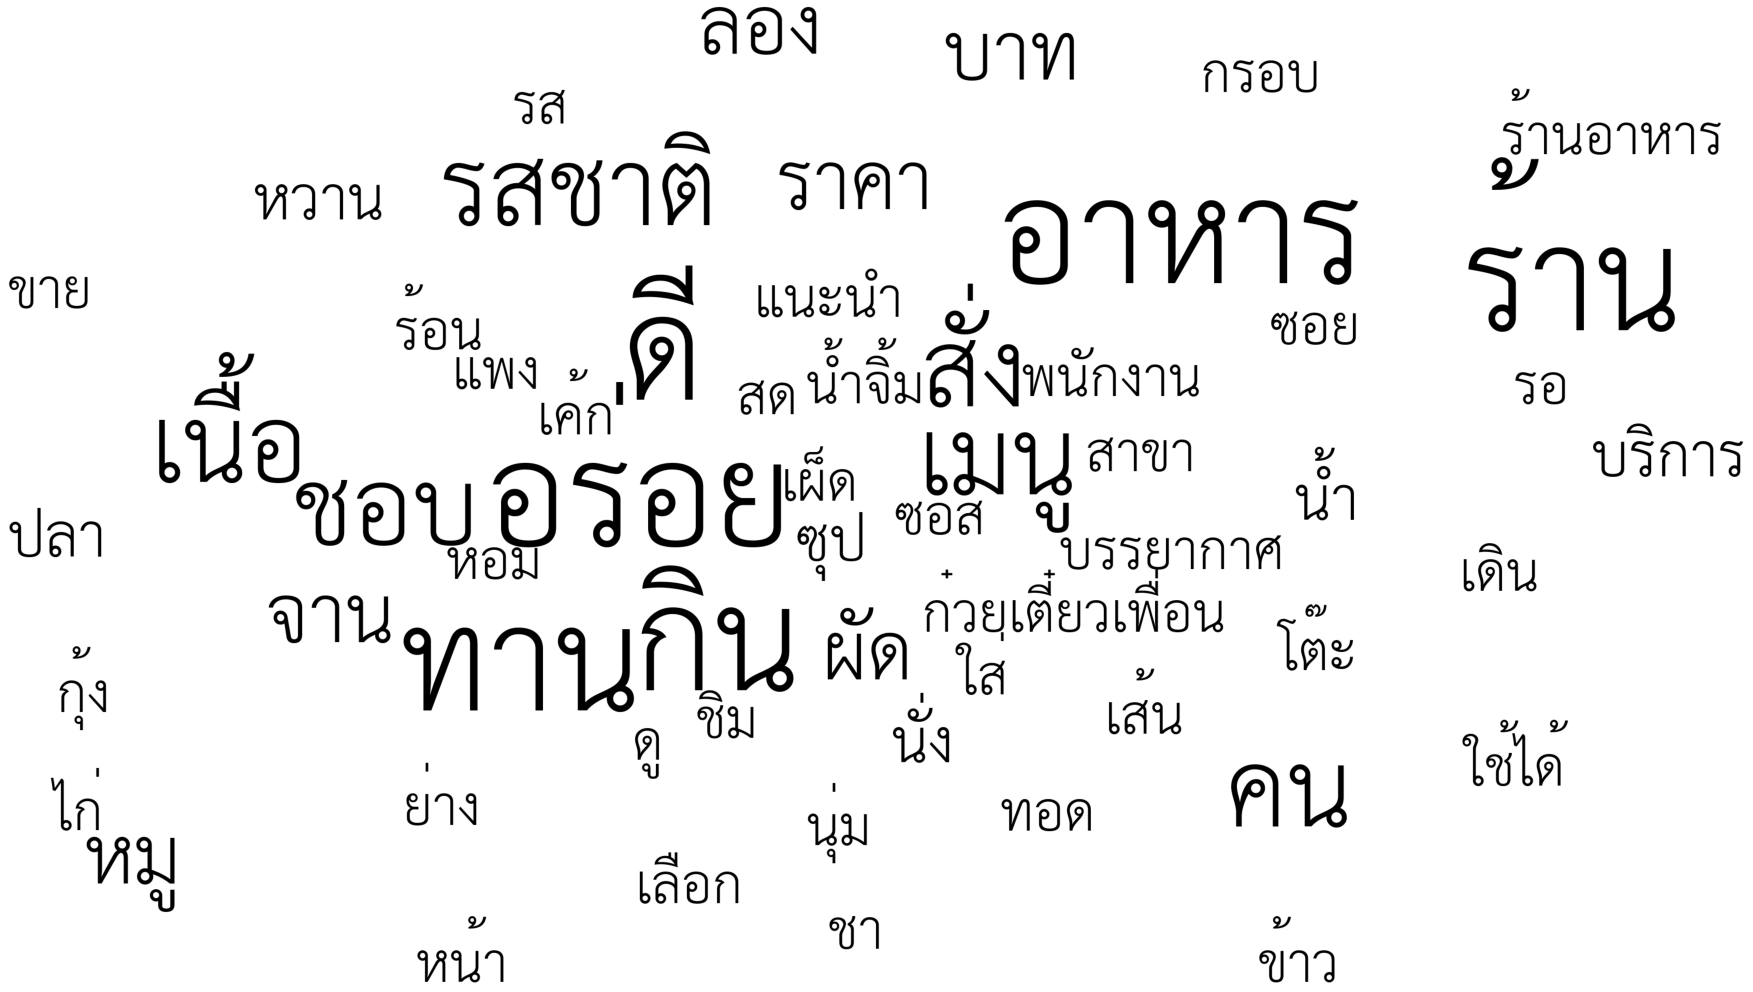

In [90]:
wn_bigrankwc = WordCloud(background_color='white',
                         width=3360,
                         height=1890,
                         colormap='tab10',
                         color_func=lambda *args, **kwargs: "black",
                         prefer_horizontal=1.0)

wn_bigrankwc.generate_from_frequencies(frequencies = wn_kmeans_bigrank  ,max_font_size=400)
plt.figure(figsize=(32,18))
plt.imshow(wn_bigrankwc)
plt.axis('off')

### Kmeans con


/Users/pzzlng1/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/Users/pzzlng1/swordcloud/swordcloud/query_integral_image.py:56: RuntimeWarning: overflow encountered in uint_scalars
  area -= integral_image[new_center_x + size_x, new_center_y] + integral_image[new_center_x, new_center_y + size_y]
/Users/pzzlng1/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/Users/pzzlng1/swordcloud/swordcloud/query_integral_image.py:56: RuntimeWarning: overflow encountered in uint_scalars
  area -= integral_image[new_center_x + size_x, new_center_y] + integral_image[new_center_x, new_center_y + size_y]
/Users/pzz

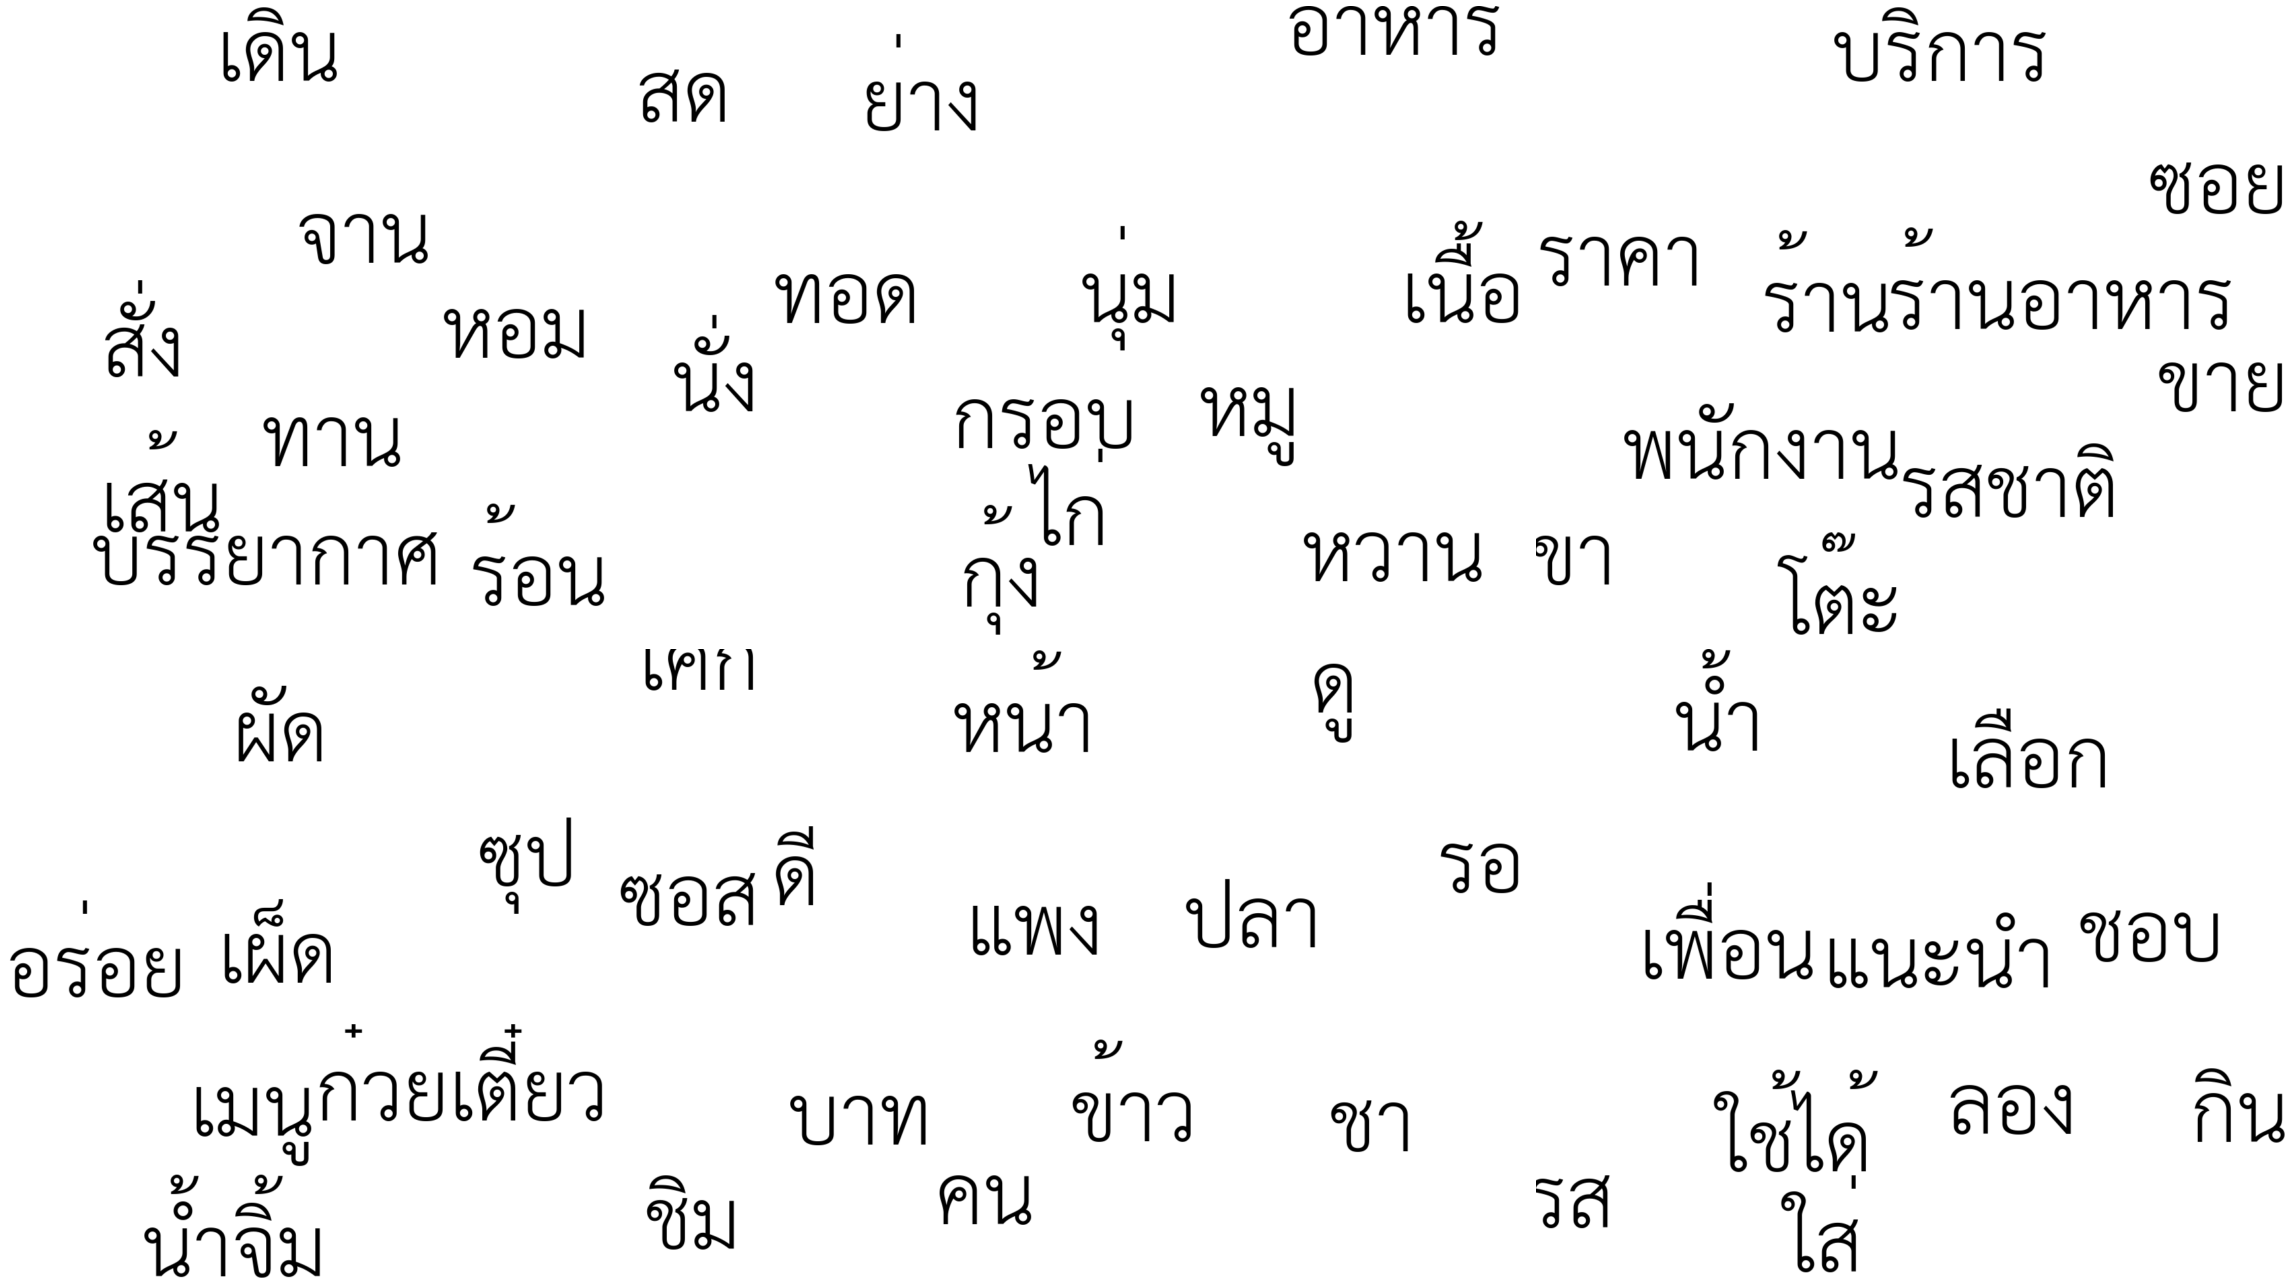

<Figure size 2304x1296 with 0 Axes>

In [91]:
wn_kmeans_eq =[]  
for i,lst in wn_k_means_freq:
  inside_lst = []
  for j,tup in enumerate(lst):
    inside_lst.append((tup[0],1))
  wn_kmeans_eq.append((i,inside_lst))
wn_kmeans_eq
# i made it equal for study but it's not necessary

wn_kmeans_wc = wc.generate_kmeans_cloud(None,wn_kmeans_eq,182,1120,945) 

###LDA

In [48]:
# i got it from lda result and just passed it ; my laziness ordered me to do it
wnldamallet_show = [(0,
  [('หวาน', 0.024051850394561394),
   ('รส', 0.018733468861346098),
   ('รสชาติ', 0.01654534723588432),
   ('ชอบ', 0.014494939558878178),
   ('อร่อย', 0.0143135068966271),
   ('ทาน', 0.014110214877478305),
   ('ลอง', 0.013885063501431788),
   ('กาแฟ', 0.013705816774870483),
   ('เค้ก', 0.013681771482282992),
   ('เมนู', 0.013504710691411459)]),
 (1,
  [('ร้าน', 0.05822836422277045),
   ('อร่อย', 0.043426173443559486),
   ('หมู', 0.03657025313991071),
   ('น้ำ', 0.03379398337445053),
   ('ทาน', 0.024812338365894946),
   ('บาท', 0.02126411900393305),
   ('รสชาติ', 0.017367720595477795),
   ('สั่ง', 0.016309439546267727),
   ('ไก่', 0.01625675455896939),
   ('ซุป', 0.015351947168410998)]),
 (2,
  [('ทาน', 0.02758668870225108),
   ('เมนู', 0.022558820383061128),
   ('เลือก', 0.017679408444984904),
   ('อาหาร', 0.01727333657899735),
   ('เนื้อ', 0.017116147469582815),
   ('ราคา', 0.013721299342643878),
   ('ซอส', 0.011990035957008779),
   ('ดี', 0.01129796723916978),
   ('สาขา', 0.011123312673153628),
   ('ญี่ปุ่น', 0.008697797387604329)]),
 (3,
  [('กิน', 0.05155257654982509),
   ('คน', 0.037223424710449704),
   ('สั่ง', 0.028136066518339803),
   ('ดู', 0.01654110675433921),
   ('รอ', 0.015900179330198473),
   ('ลอง', 0.012850918554741029),
   ('พนักงาน', 0.012738702305396523),
   ('โต๊ะ', 0.010149096551292537),
   ('เพื่อน', 0.009337686748339956),
   ('ร้าน', 0.008968667928380136)]),
 (4,
  [('ร้าน', 0.15051513270148353),
   ('นั่ง', 0.026904992423880624),
   ('บรรยากาศ', 0.023462091182612697),
   ('บริการ', 0.01553864255043872),
   ('อาหาร', 0.01479622626764324),
   ('ดี', 0.013621819223805946),
   ('ราคา', 0.013411250862896119),
   ('จอด', 0.009994399315761368),
   ('ซอย', 0.009579775017475003),
   ('แวะ', 0.009106538907388996)]),
 (5,
  [('อร่อย', 0.04730496861208424),
   ('อาหาร', 0.029894725681544082),
   ('เมนู', 0.029293915471304686),
   ('รสชาติ', 0.02837502926740914),
   ('ดี', 0.027794098806773252),
   ('ปลา', 0.025770782069349404),
   ('จาน', 0.022170338530047136),
   ('ทอด', 0.021209483965877515),
   ('กุ้ง', 0.020476142091614722),
   ('สด', 0.015855204739332305)])]

In [49]:
wn_ldamallet_eq =[]  # i just make it equal for study but it's not necessary 
for i,lst in wnldamallet_show:
  inside_lst = []
  for j,tup in enumerate(lst):
    inside_lst.append((tup[0],1))
  wn_ldamallet_eq.append((i,inside_lst))
wn_ldamallet_eq

[(0,
  [('หวาน', 1),
   ('รส', 1),
   ('รสชาติ', 1),
   ('ชอบ', 1),
   ('อร่อย', 1),
   ('ทาน', 1),
   ('ลอง', 1),
   ('กาแฟ', 1),
   ('เค้ก', 1),
   ('เมนู', 1)]),
 (1,
  [('ร้าน', 1),
   ('อร่อย', 1),
   ('หมู', 1),
   ('น้ำ', 1),
   ('ทาน', 1),
   ('บาท', 1),
   ('รสชาติ', 1),
   ('สั่ง', 1),
   ('ไก่', 1),
   ('ซุป', 1)]),
 (2,
  [('ทาน', 1),
   ('เมนู', 1),
   ('เลือก', 1),
   ('อาหาร', 1),
   ('เนื้อ', 1),
   ('ราคา', 1),
   ('ซอส', 1),
   ('ดี', 1),
   ('สาขา', 1),
   ('ญี่ปุ่น', 1)]),
 (3,
  [('กิน', 1),
   ('คน', 1),
   ('สั่ง', 1),
   ('ดู', 1),
   ('รอ', 1),
   ('ลอง', 1),
   ('พนักงาน', 1),
   ('โต๊ะ', 1),
   ('เพื่อน', 1),
   ('ร้าน', 1)]),
 (4,
  [('ร้าน', 1),
   ('นั่ง', 1),
   ('บรรยากาศ', 1),
   ('บริการ', 1),
   ('อาหาร', 1),
   ('ดี', 1),
   ('ราคา', 1),
   ('จอด', 1),
   ('ซอย', 1),
   ('แวะ', 1)]),
 (5,
  [('อร่อย', 1),
   ('อาหาร', 1),
   ('เมนู', 1),
   ('รสชาติ', 1),
   ('ดี', 1),
   ('ปลา', 1),
   ('จาน', 1),
   ('ทอด', 1),
   ('กุ้ง', 1),
   ('สด', 1)])]

/Users/pzzlng1/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/Users/pzzlng1/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/Users/pzzlng1/swordcloud/swordcloud/query_integral_image.py:56: RuntimeWarning: overflow encountered in uint_scalars
  area -= integral_image[new_center_x + size_x, new_center_y] + integral_image[new_center_x, new_center_y + size_y]
/Users/pzzlng1/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.


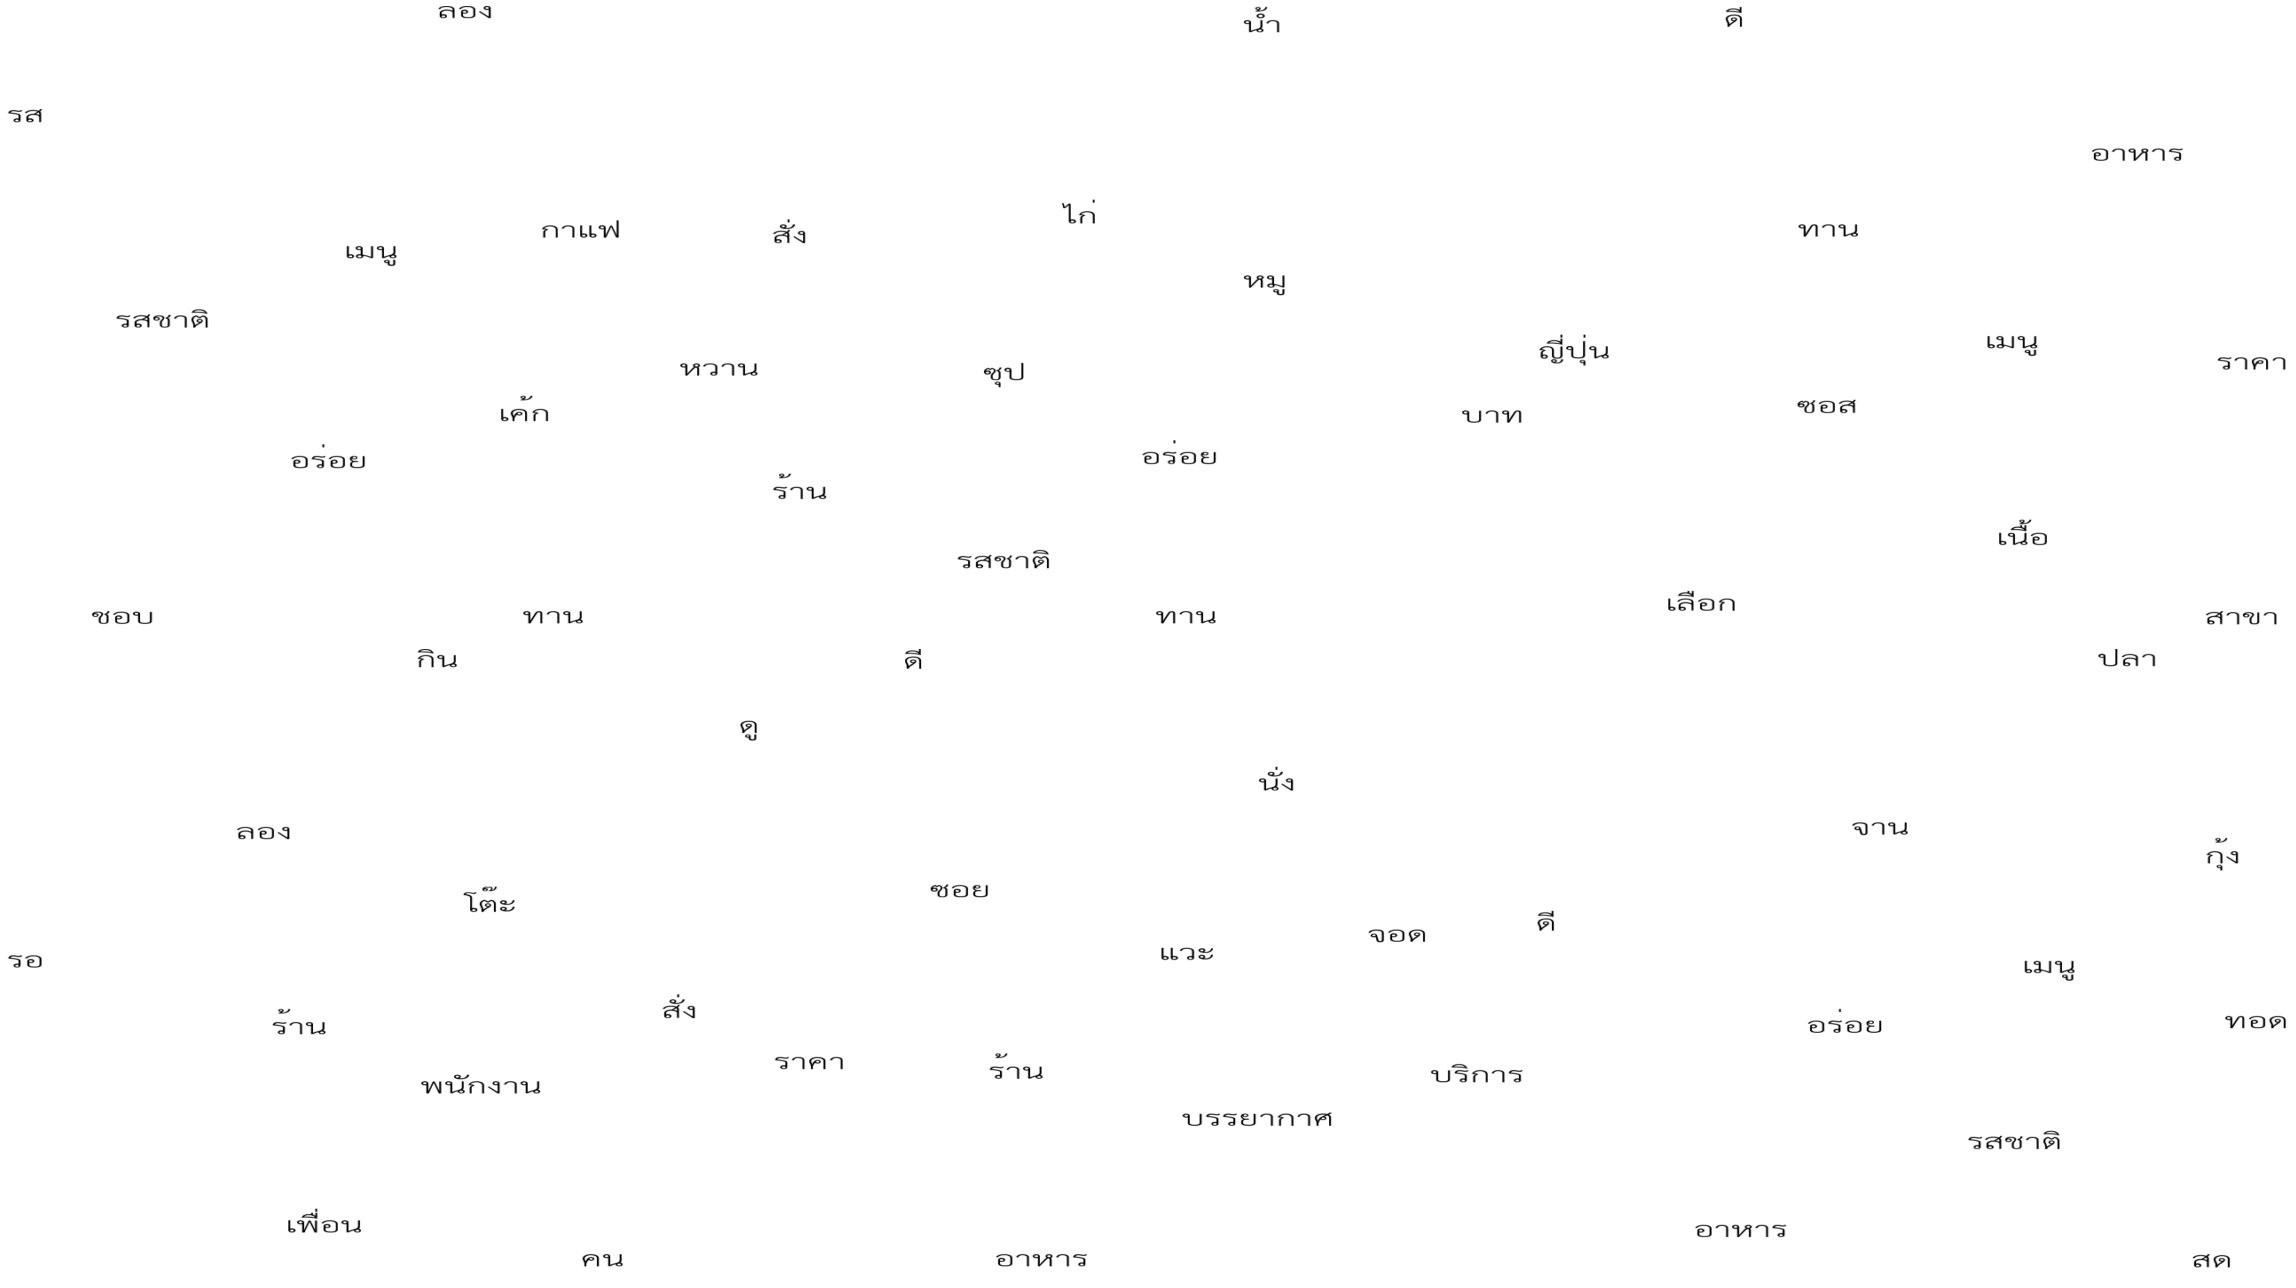

<Figure size 2304x1296 with 0 Axes>

In [51]:
wn_lda_wc = wc.generate_kmeans_cloud(None,wn_ldamallet_eq,60,850,1250) 

## kmeans recol

In [92]:
cols = ["#BF0F61","#4696A2","#D95043","#55A45B","#695752","#834fab"]

In [93]:
color_to_words = {cols[col]: [ wn_k_means_freq[col][1][i][0] for i in range(10) ] for col in range(len(wn_k_means_freq))}
color_to_words

{'#BF0F61': ['ทาน',
  'สั่ง',
  'จาน',
  'นั่ง',
  'บรรยากาศ',
  'หอม',
  'สด',
  'เส้น',
  'ร้อน',
  'เดิน'],
 '#4696A2': ['อาหาร',
  'เนื้อ',
  'หมู',
  'หวาน',
  'ทอด',
  'นุ่ม',
  'กุ้ง',
  'กรอบ',
  'ไก่',
  'ย่าง'],
 '#D95043': ['ร้าน',
  'รสชาติ',
  'ราคา',
  'บริการ',
  'สาขา',
  'ขาย',
  'โต๊ะ',
  'พนักงาน',
  'ร้านอาหาร',
  'ซอย'],
 '#55A45B': ['อร่อย',
  'เมนู',
  'ผัด',
  'ซุป',
  'เค้ก',
  'ก๋วยเตี๋ยว',
  'ชิม',
  'น้ำจิ้ม',
  'ซอส',
  'เผ็ด'],
 '#695752': ['ดี',
  'คน',
  'บาท',
  'ปลา',
  'ดู',
  'ข้าว',
  'แพง',
  'หน้า',
  'รอ',
  'ชา'],
 '#834fab': ['กิน',
  'ชอบ',
  'ลอง',
  'น้ำ',
  'รส',
  'เลือก',
  'แนะนำ',
  'ใส่',
  'ใช้ได้',
  'เพื่อน']}

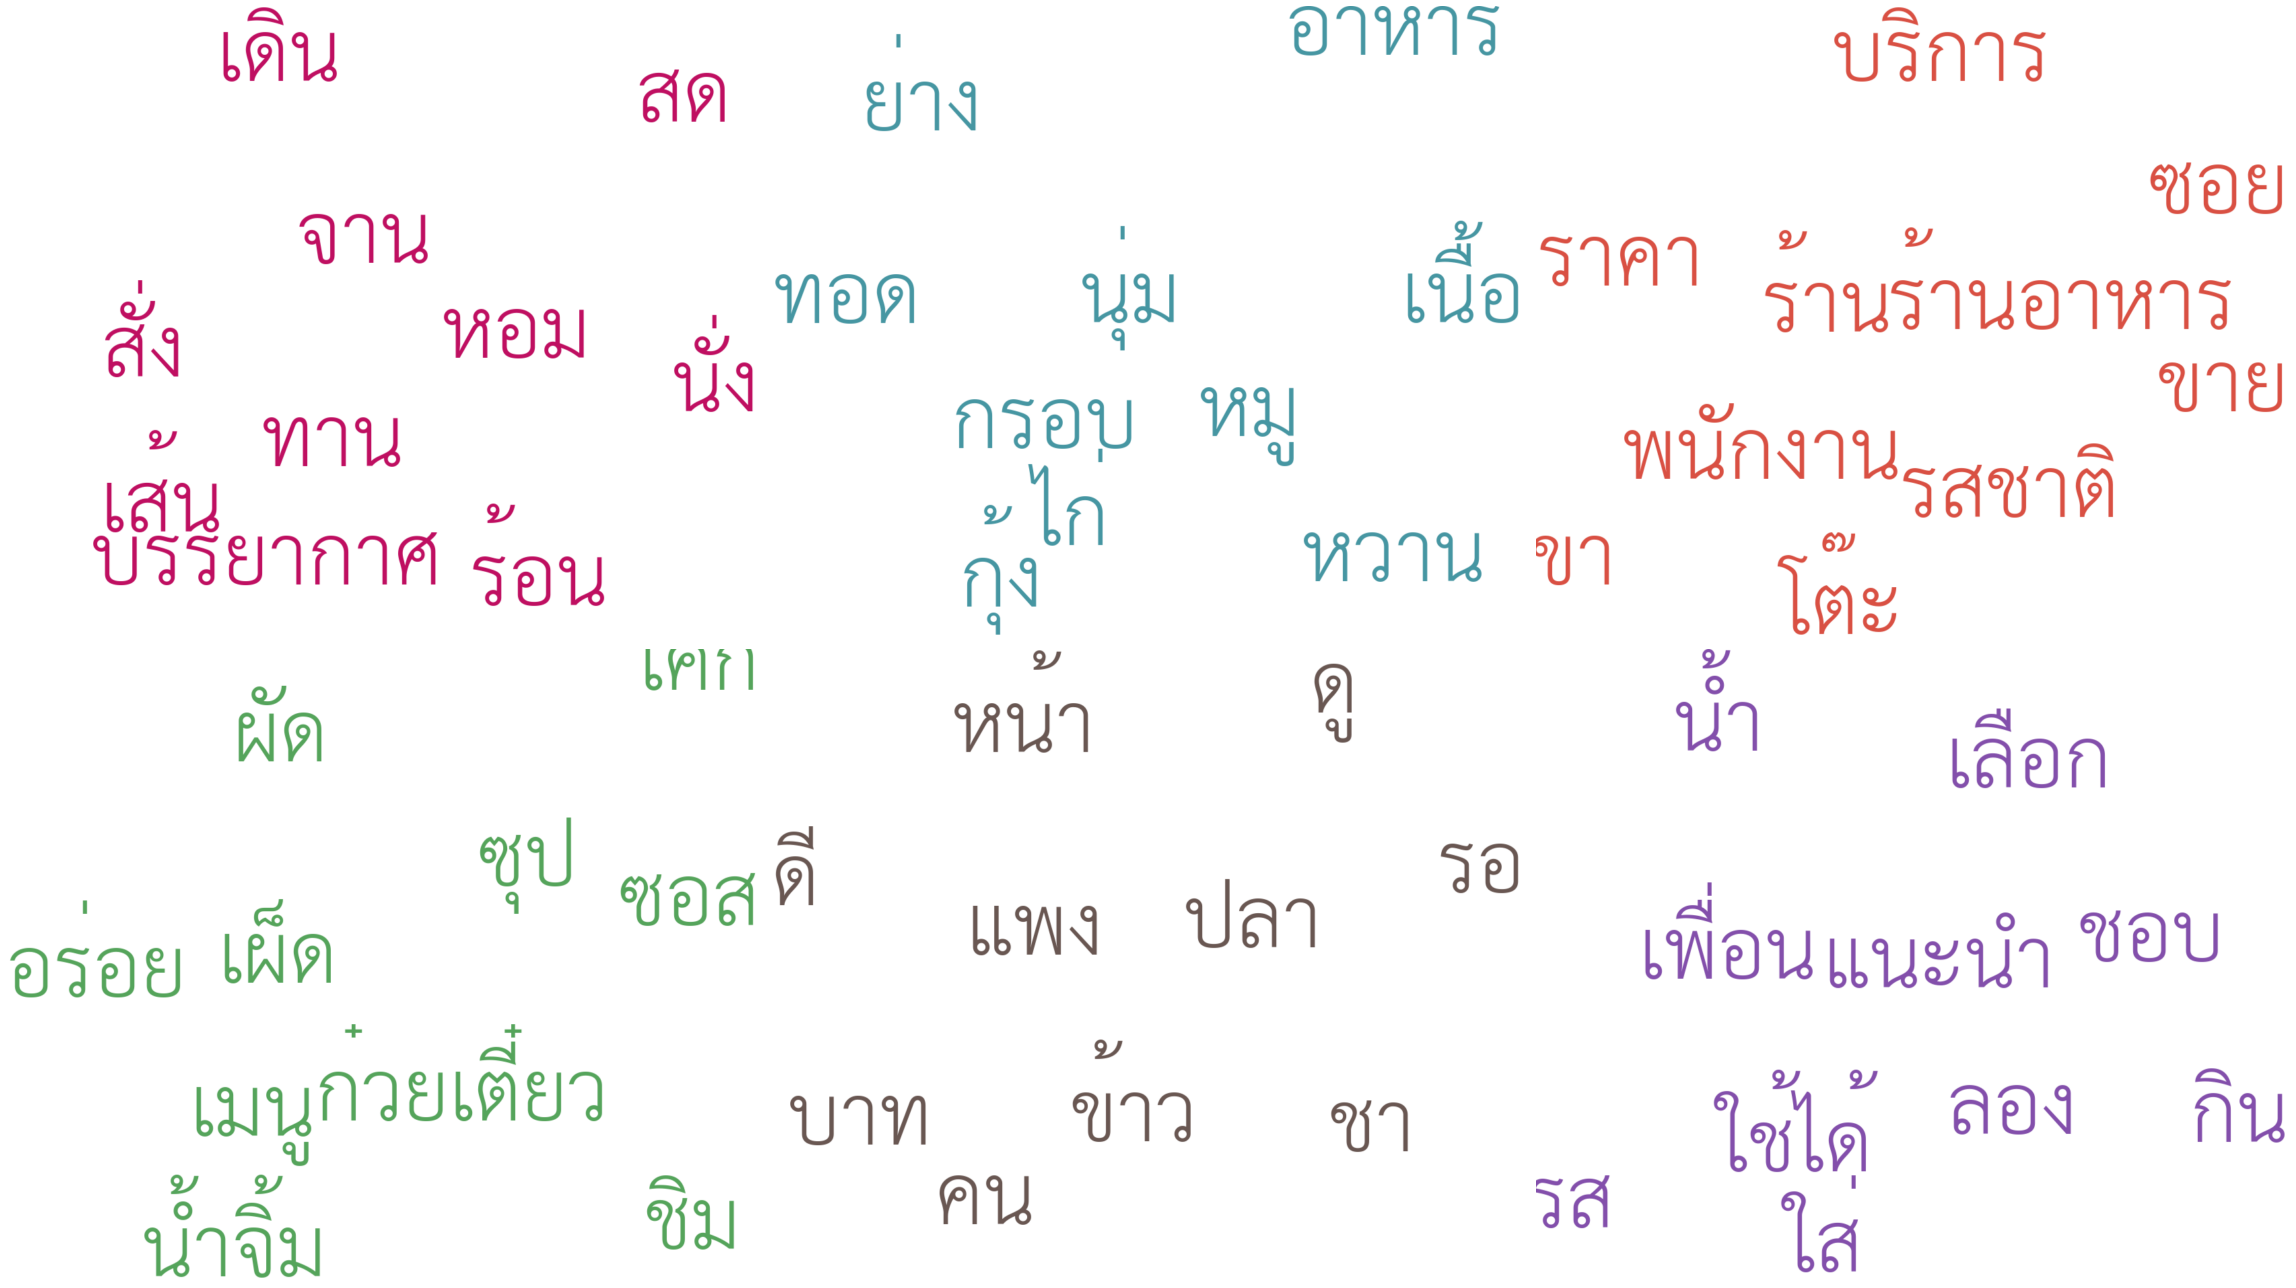

<Figure size 2304x1296 with 0 Axes>

In [94]:
default_color = "#2D2926"

# Create a color function with multiple tones
grouped_color_func = wc.grouped_color_func(color_to_words,default_color)

fig2, axes2 = plt.subplots(2,3, figsize=(32,18), sharex=True, sharey=True)

for i, ax in enumerate(axes2.flatten()):
    fig2.add_subplot(ax)
          
    fig2.tight_layout(rect=[0, 0.03, 1, 0.95])
# Apply our color function
    wn_kmeans_wc[i].recolor(color_func=grouped_color_func)

    plt.gca().imshow(wn_kmeans_wc[i],aspect="auto",interpolation = "bilinear")  # blur it right here
    plt.gca().axis('off')



plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.figure(figsize=(32,18))
plt.show()

In [95]:
wn_k_means_freq

[(0,
  [('ทาน', 0.2667829643888354),
   ('สั่ง', 0.20301973051010588),
   ('จาน', 0.10635226179018287),
   ('นั่ง', 0.09311838306063523),
   ('บรรยากาศ', 0.08409528392685274),
   ('หอม', 0.06334215591915303),
   ('สด', 0.05582290664100096),
   ('เส้น', 0.043250721847930704),
   ('ร้อน', 0.04270933589990376),
   ('เดิน', 0.04150625601539942)]),
 (1,
  [('อาหาร', 0.2322864802757564),
   ('เนื้อ', 0.1353249074428699),
   ('หมู', 0.11974977658623771),
   ('หวาน', 0.11049406357717349),
   ('ทอด', 0.08228009702540534),
   ('นุ่ม', 0.07449253159708924),
   ('กุ้ง', 0.07289671900931954),
   ('กรอบ', 0.06370483850376611),
   ('ไก่', 0.058534405719392314),
   ('ย่าง', 0.05023618026298991)]),
 (2,
  [('ร้าน', 0.5060240963855421),
   ('รสชาติ', 0.1421836413978897),
   ('ราคา', 0.10697448177804385),
   ('บริการ', 0.045087181022225545),
   ('สาขา', 0.03820249943874878),
   ('ขาย', 0.038052832447803636),
   ('โต๊ะ', 0.038052832447803636),
   ('พนักงาน', 0.030382399161864852),
   ('ร้านอาหาร', 0.02918

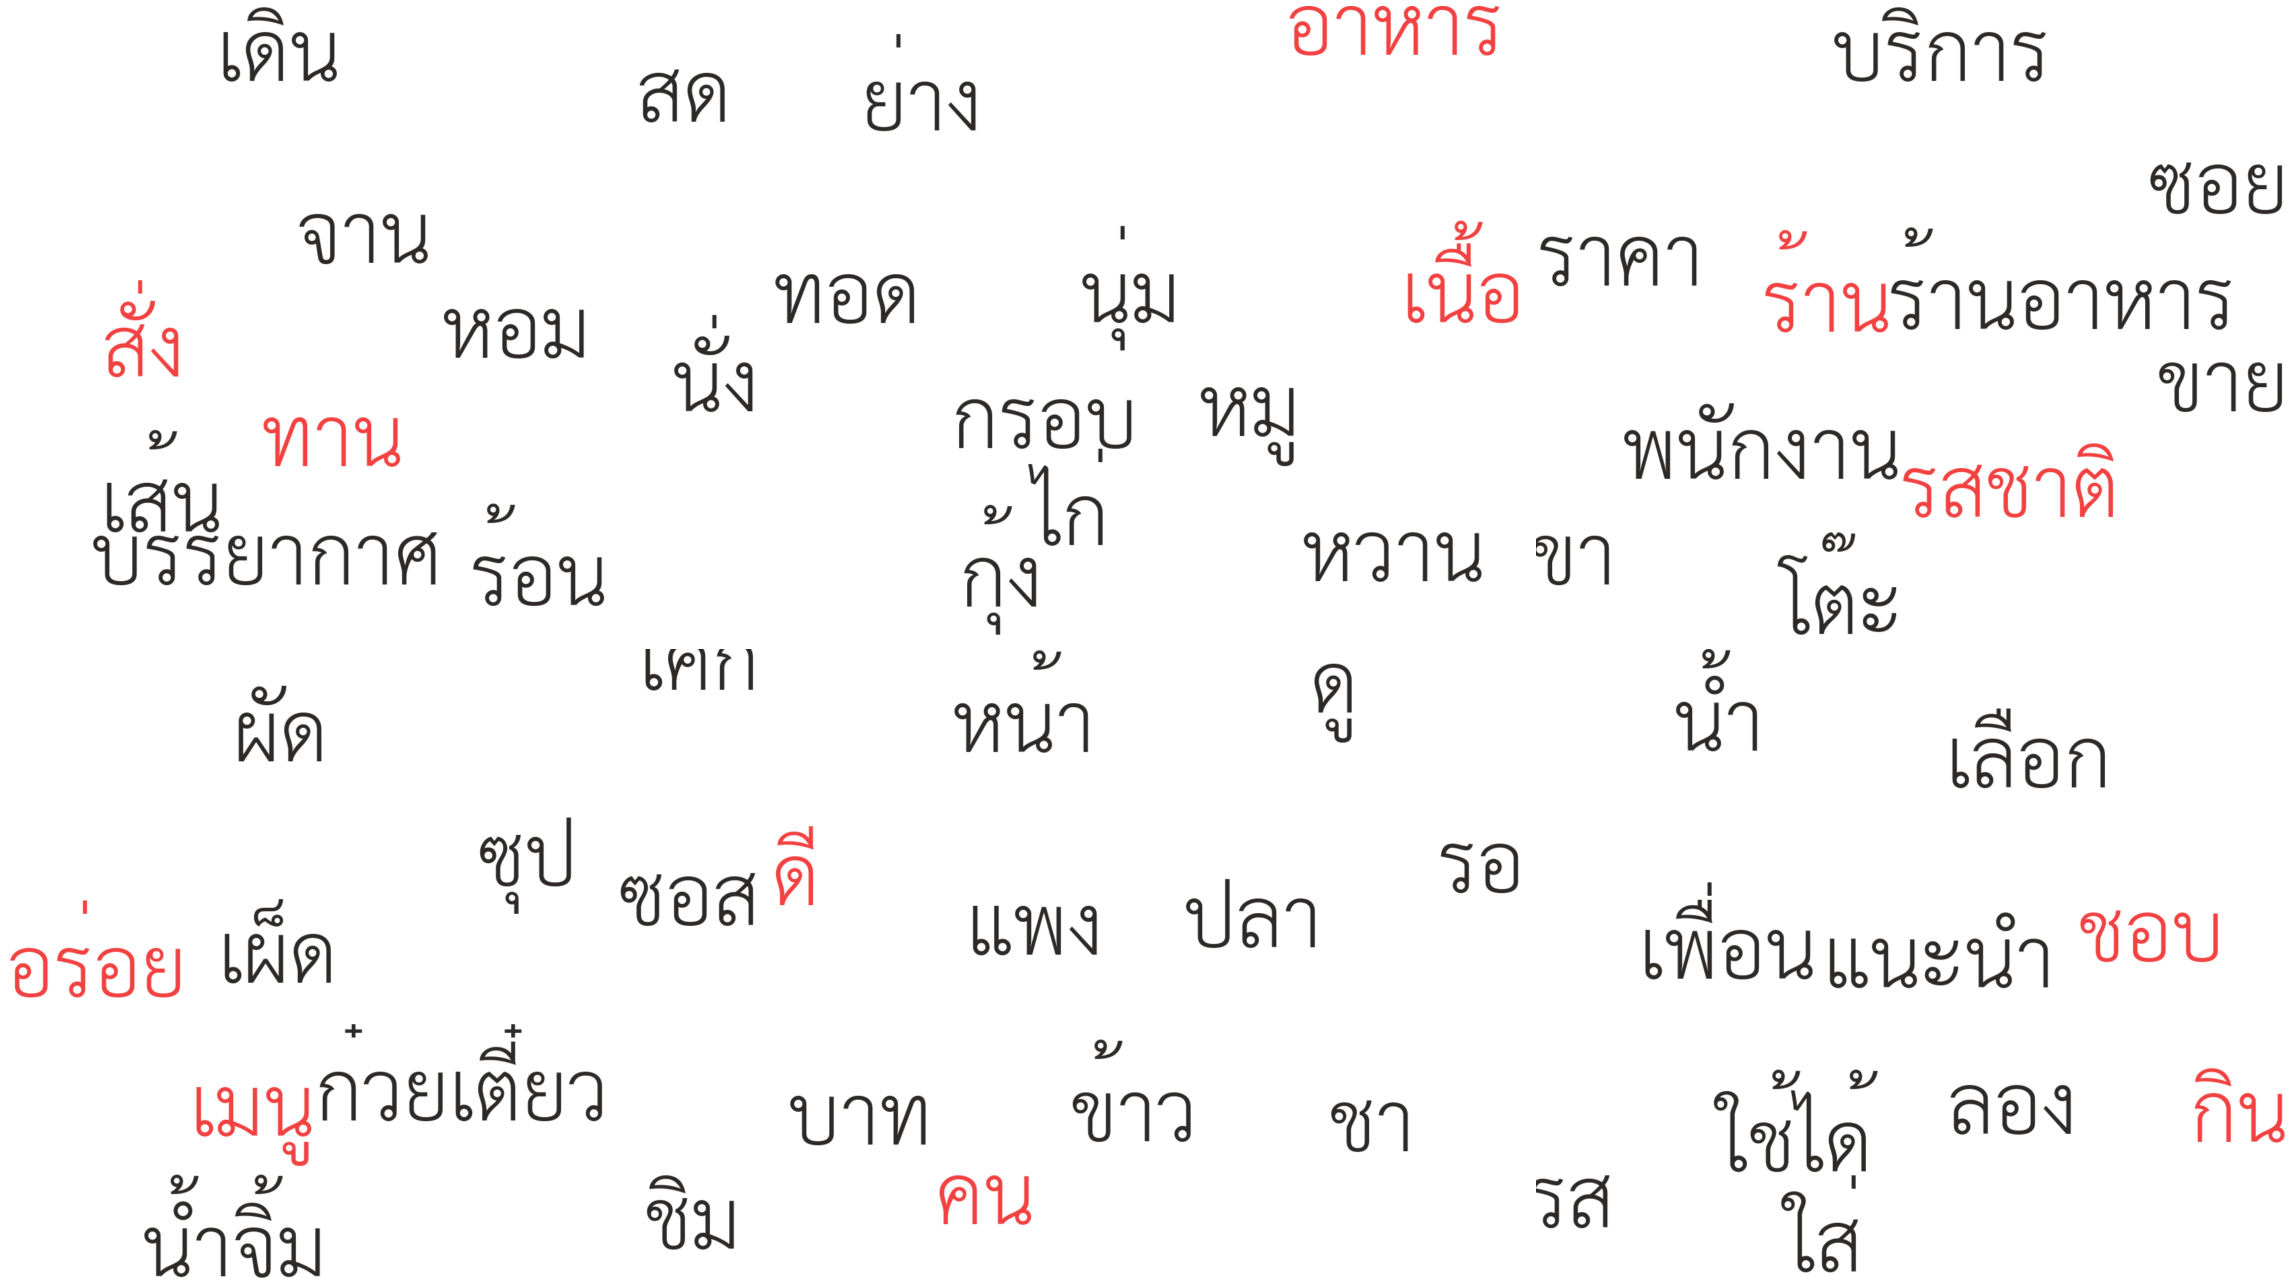

<Figure size 2304x1296 with 0 Axes>

In [96]:
cherry = "#F24141"
color_to_words = {cherry: [ wn_k_means_freq[col][1][i][0] for i in range(10) if i < 2 for col in range(len(wn_k_means_freq)) ]}
color_to_words
default_color = "#2D2926"

# Create a color function with multiple tones
grouped_color_func = wc.grouped_color_func(color_to_words,default_color)

fig2, axes2 = plt.subplots(2,3, figsize=(32,18), sharex=True, sharey=True)

for i, ax in enumerate(axes2.flatten()):
    fig2.add_subplot(ax)
          
    fig2.tight_layout(rect=[0, 0.03, 1, 0.95])
# Apply our color function
    wn_kmeans_wc[i].recolor(color_func=grouped_color_func)

    plt.gca().imshow(wn_kmeans_wc[i],aspect="auto",interpolation = "bilinear")  # blur it right here
    plt.gca().axis('off')



plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.figure(figsize=(32,18))
plt.show()